# 다중분류_모델개발후_서비스시_모델사용법_test데이터적용

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [19]:
data = pd.read_csv('./data/wine_test.csv')
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
1,1,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
2,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
3,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
4,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
68,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
69,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
70,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562


In [20]:
# 와인 종류를 구분하는 데이터 -> 와인 종류 3가지
data['와인_종류'].value_counts(normalize=True)

와인_종류
2    0.402778
1    0.333333
3    0.263889
Name: proportion, dtype: float64

In [21]:
# 결측치 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   와인_종류                   72 non-null     int64  
 1   알코올_도수                  72 non-null     float64
 2   사과산_함량                  72 non-null     float64
 3   재_함량                    72 non-null     float64
 4   재의_알칼리도                 72 non-null     float64
 5   마그네슘_함량                 72 non-null     int64  
 6   총_페놀_함량                 72 non-null     float64
 7   플라보노이드_함량               72 non-null     float64
 8   비플라보노이드_페놀_함량           72 non-null     float64
 9   프로안토시아닌_함량              72 non-null     float64
 10  색_강도                    72 non-null     float64
 11  색조                      72 non-null     float64
 12  희석_와인의_투과율_OD280_OD315  72 non-null     float64
 13  프롤린_함량                  72 non-null     int64  
dtypes: float64(11), int64(3)
memory usage: 8.0 K

<Axes: >

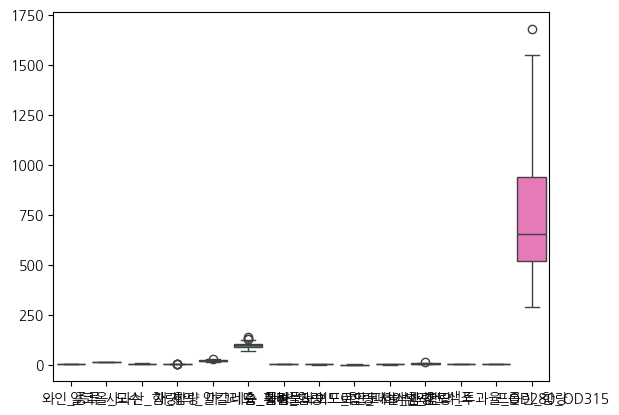

In [22]:
# 이상치 확인
sns.boxplot(data)

<Axes: >

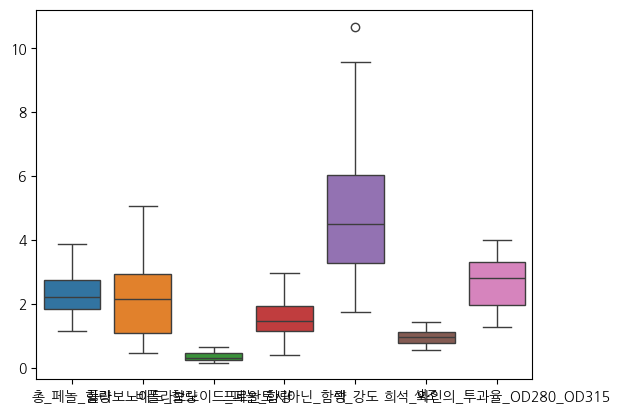

In [23]:
# 이상치 존재하지만 크게 영향을 줄 정도는 아니므로 상관 없음
sns.boxplot(data.iloc[:, 6:-1])

# 서비스에 해당 모델을 적용하여 사용하는 방법
- MinMaxScaler로 스케일링
- 홀드아웃 : train, valid, test
- mms = MinMaxScaler() 
- mms_train = mms.fit_transform(X_train)
- mms_valid = mms.transfrom(X_valid)
- mms_test = mms.transfrom(X_test)

In [24]:
X_test = data.drop("와인_종류", axis=1)
y_test = data['와인_종류']

## 훈련시 사용한 MinMaxScaler를 불러와서 스케일링

In [25]:
import joblib

In [26]:
mms = joblib.load("./model/MinMaxScaler_joblib.joblib- MinMaxScaler로 스케일링
- 홀드아웃 : train, valid, test
- mms = MinMaxScaler() 
- mms_train = mms.fit_transform(X_train)
- mms_valid = mms.transfrom(X_valid)
- mms_test = mms.transfrom(X_test)")
X_test_temp = mms.transform(X_test)
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns)
X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,0.839474,0.629098,0.618280,0.158537,0.564103,0.673077,0.796875,0.122449,0.580420,0.325939,0.333333,0.849421,0.389652
1,0.644737,0.182377,0.564516,0.603659,0.205128,0.557692,0.778125,0.244898,0.503497,0.325939,0.455285,0.826255,0.518998
2,0.647368,0.151639,0.473118,0.817073,0.038462,0.242308,0.421875,0.265306,0.213287,0.209898,0.406504,0.559846,0.156831
3,0.313158,0.075820,0.311828,0.512195,0.102564,0.426923,0.484375,0.510204,0.580420,0.121160,0.308943,0.652510,0.027486
4,0.192105,0.360656,0.838710,0.573171,0.243590,0.192308,0.481250,0.938776,0.220280,0.215017,0.609756,0.451737,0.265966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.563158,0.342213,0.543011,0.573171,0.461538,0.153846,0.059375,0.795918,0.363636,0.684300,0.097561,0.111969,0.454325
68,0.797368,0.145492,0.494624,0.329268,0.538462,0.673077,0.837500,0.204082,0.587413,0.372867,0.495935,0.918919,0.405821
69,0.365789,0.719262,0.736559,0.969512,0.230769,0.365385,0.512500,0.591837,0.451049,0.068259,0.357724,0.691120,0.070331
70,0.163158,0.153689,0.677419,0.939024,0.051282,0.257692,0.350000,0.530612,0.321678,0.112628,0.715447,0.725869,0.229588


In [27]:
y_test = pd.get_dummies(y_test)

## train 데이터로 개발한 best 모델을 불러와 예측

In [28]:
from keras.models import load_model

In [30]:
# gpu 몌모리 부족으로 인한 문제 발생
# best_model = load_model("./model/wine_best_model.keras")
# result = best_model.evaluate(X_test, y_test)
# print("loss ", result[0], "accuracy ", result[1])

# 랜덤포레스트 모델 불러와서 분석


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [18]:
data = pd.read_csv("./data/wine_test.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
1,1,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
2,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
3,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
4,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
68,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
69,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
70,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562


## 테스트 데이터에 트레인데이터에 해주었던 작업을 동일하게 적용
- MinMaxScaler로 스케일링
- 홀드아웃 : train, valid, test
- mms = MinMaxScaler() 
- mms_train = mms.fit_transform(X_train)
- mms_valid = mms.transfrom(X_valid)
- mms_test = mms.transfrom(X_test)

In [31]:
X_test = data.drop("와인_종류", axis=1)
y_test = data['와인_종류']

## 훈련시 사용한 MinMaxScaler를 불러와 스케일링

In [32]:
import joblib

In [34]:
mms = joblib.load("./model/MinMaxScaler_joblib.joblib")
X_test_temp = mms.transform(X_test)
X_test = pd.DataFrame(X_test_temp, columns=X_test.columns)
X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,0.839474,0.629098,0.618280,0.158537,0.564103,0.673077,0.796875,0.122449,0.580420,0.325939,0.333333,0.849421,0.389652
1,0.644737,0.182377,0.564516,0.603659,0.205128,0.557692,0.778125,0.244898,0.503497,0.325939,0.455285,0.826255,0.518998
2,0.647368,0.151639,0.473118,0.817073,0.038462,0.242308,0.421875,0.265306,0.213287,0.209898,0.406504,0.559846,0.156831
3,0.313158,0.075820,0.311828,0.512195,0.102564,0.426923,0.484375,0.510204,0.580420,0.121160,0.308943,0.652510,0.027486
4,0.192105,0.360656,0.838710,0.573171,0.243590,0.192308,0.481250,0.938776,0.220280,0.215017,0.609756,0.451737,0.265966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.563158,0.342213,0.543011,0.573171,0.461538,0.153846,0.059375,0.795918,0.363636,0.684300,0.097561,0.111969,0.454325
68,0.797368,0.145492,0.494624,0.329268,0.538462,0.673077,0.837500,0.204082,0.587413,0.372867,0.495935,0.918919,0.405821
69,0.365789,0.719262,0.736559,0.969512,0.230769,0.365385,0.512500,0.591837,0.451049,0.068259,0.357724,0.691120,0.070331
70,0.163158,0.153689,0.677419,0.939024,0.051282,0.257692,0.350000,0.530612,0.321678,0.112628,0.715447,0.725869,0.229588


In [36]:
y_test = pd.get_dummies(y_test)

## train 데이터로 개발한 best 모델을 불러와 예측

In [37]:
from keras.models import load_model

In [40]:
# gpu 몌모리 부족으로 인한 문제 발생
# best_model = load_model("./model/wine_best_model.keras")
# result = best_model.evaluate(X_test, y_test)
# print("loss ", result[0], "accuracy ", result[1])